In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
path="/Users/zhangyuanzhuo/425 ML/"
import os
os.chdir(path)
df = pd.read_csv("marketing_campaign.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df = df.drop(['job', 'marital', 'education', 'contact', 'day', 'month'], axis=1)
df['poutcome'] = df['poutcome'].map({'failure': 0, 'nonexistent': 0, 'success': 1})
df['poutcome'] = df['poutcome'].fillna(0)
categorical_columns = ['poutcome','default', 'housing', 'loan','y']
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)
df_dummies.columns = categorical_columns
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, df_dummies], axis=1)
train_df, test_df = train_test_split(df, test_size=1/3, random_state=42)
train_X = train_df.drop('y', axis=1)
train_y = train_df['y']
test_X = test_df.drop('y', axis=1)
test_y = test_df['y']
df.head()

,age,balance,duration,campaign,pdays,previous,poutcome,default,housing,loan,y
0,58,2143,261,1,-1,0,0.0,0,1,0,0
1,44,29,151,1,-1,0,0.0,0,1,0,0
2,33,2,76,1,-1,0,0.0,0,1,1,0
3,47,1506,92,1,-1,0,0.0,0,1,0,0
4,33,1,198,1,-1,0,0.0,0,0,0,0


### (i)

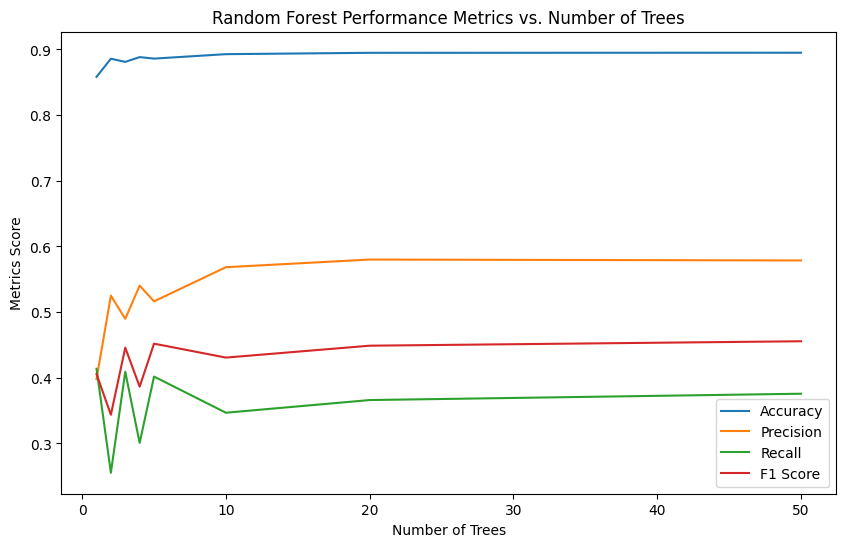

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

num_trees = [1, 2, 3, 4, 5, 10, 20, 50]

accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

for n_trees in num_trees:
    model = RandomForestClassifier(n_estimators=n_trees,max_features='sqrt', random_state=42)
    model.fit(train_X, train_y)

    predictions = model.predict(test_X)

    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

plt.figure(figsize=(10, 6))

plt.plot(num_trees, accuracy_list, label='Accuracy')
plt.plot(num_trees, precision_list, label='Precision')
plt.plot(num_trees, recall_list, label='Recall')
plt.plot(num_trees, f1_list, label='F1 Score')

plt.xlabel('Number of Trees')
plt.ylabel('Metrics Score')
plt.title('Random Forest Performance Metrics vs. Number of Trees')
plt.legend()
plt.show()

### (ii)

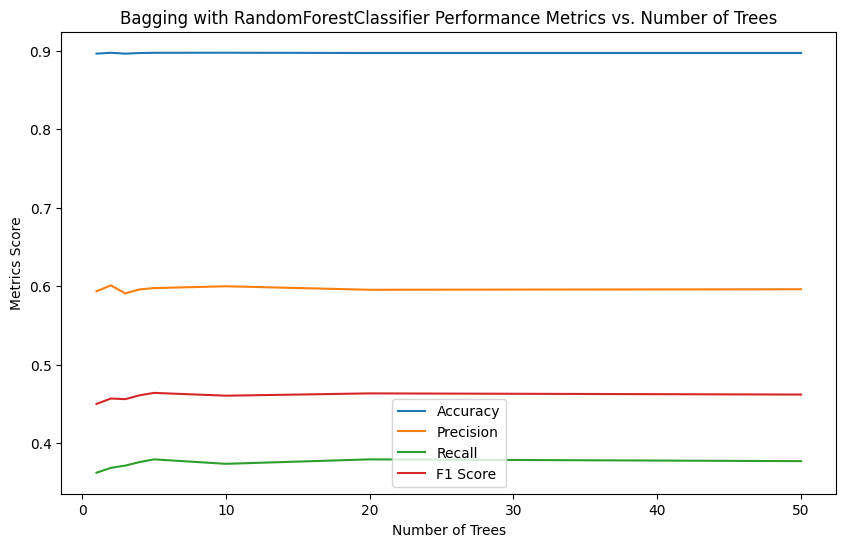

In [4]:
from sklearn.ensemble import BaggingClassifier

num_trees = [1, 2, 3, 4, 5, 10, 20, 50]

accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

for n_trees in num_trees:
    
    base = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    model = BaggingClassifier(estimator = base, n_estimators = 50)
    model.fit(train_X, train_y)

    predictions = model.predict(test_X)

    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

plt.figure(figsize=(10, 6))

plt.plot(num_trees, accuracy_list, label='Accuracy')
plt.plot(num_trees, precision_list, label='Precision')
plt.plot(num_trees, recall_list, label='Recall')
plt.plot(num_trees, f1_list, label='F1 Score')

plt.xlabel('Number of Trees')
plt.ylabel('Metrics Score')
plt.title('Bagging with RandomForestClassifier Performance Metrics vs. Number of Trees')
plt.legend()
plt.show()

### (iii)

In [5]:
best_model = None
best_f1_score = 0

for n_trees in num_trees:

    model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    model.fit(train_X, train_y)

    predictions = model.predict(test_X)

    f1 = f1_score(test_y, predictions)

    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model

feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
2,duration,0.374091
1,balance,0.210734
0,age,0.164544
6,poutcome,0.070295
4,pdays,0.061864
3,campaign,0.048610
5,previous,0.031217
8,housing,0.024237
9,loan,0.011673
7,default,0.002734


In [6]:
best_model = None
best_f1_score = 0

for n_trees in num_trees:

    model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    model.fit(train_X, train_y)

    predictions = model.predict(test_X)

    f1 = f1_score(test_y, predictions)

#     if f1 > best_f1_score:
#         best_f1_score = f1
#         best_model = model

    feature_importances = model.feature_importances_

    importance_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df)

    Feature  Importance
2  duration    0.377228
1   balance    0.212993
0       age    0.155655
4     pdays    0.083644
6  poutcome    0.078261
3  campaign    0.044688
8   housing    0.018414
5  previous    0.017850
9      loan    0.009478
7   default    0.001788
    Feature  Importance
2  duration    0.373695
1   balance    0.211151
0       age    0.159750
6  poutcome    0.089950
4     pdays    0.071835
3  campaign    0.044122
5  previous    0.019175
8   housing    0.016083
9      loan    0.011590
7   default    0.002650
    Feature  Importance
2  duration    0.370894
1   balance    0.211632
0       age    0.165374
4     pdays    0.076309
6  poutcome    0.070142
3  campaign    0.046982
8   housing    0.023385
5  previous    0.020150
9      loan    0.012411
7   default    0.002721
    Feature  Importance
2  duration    0.373560
1   balance    0.211143
0       age    0.167220
4     pdays    0.076269
6  poutcome    0.068903
3  campaign    0.044120
8   housing    0.024344
5  previous    0

The feature "duration" dominates as the most important predictor in the RandomForestClassifier, with an importance score of approximately 0.3471. This suggests that the duration of the call significantly influences the model's predictions for subscription to a term deposit. Other features such as "balance" and "age" also contribute meaningfully, but "duration" stands out as the clear leader in terms of importance.

### (iv)

Beyond sampling variation, the alternating pattern in performance metrics when the number of trees is very small may be attributed to the inherent instability of individual decision trees. With a small ensemble, each tree's predictions have a more significant impact, and if their decisions align with specific patterns in the training data, it can cause fluctuations in performance metrics. This sensitivity diminishes as the number of trees increases, allowing the ensemble to better generalize and reducing the influence of individual tree idiosyncrasies, resulting in more stable performance metrics.